In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Loading the dataset
data = pd.read_csv('LoanApplicant.csv')

features = list(data.columns.values) #get col names

#Print the first 5 rows of the dataframe.
data.head()

,Income,Education,Age,Residence,Employ,Savings,Debt,Credit cards
0,50000,16,28,2,2,5000,1200,2
1,72000,18,35,10,8,12000,5400,4
2,61000,18,36,6,5,15000,1000,2
3,88000,20,35,4,4,980,1100,4
4,91100,18,38,8,9,20000,0,1


In [3]:
sumry = np.round(data.describe().transpose(),decimals=2)
print("Summary Statistics:\n",sumry.drop(['25%','50%','75%'],axis=1))

Summary Statistics:
               count      mean       std      min      max
Income         30.0  48646.00  18505.45  21240.0  91100.0
Education      30.0     15.27      2.13     12.0     20.0
Age            30.0     32.80      4.63     26.0     41.0
Residence      30.0      5.93      3.98      1.0     15.0
Employ         30.0      5.50      3.66      1.0     14.0
Savings        30.0   8319.33   8550.50      0.0  34000.0
Debt           30.0   3812.00   5042.51      0.0  22000.0
Credit cards   30.0      2.87      1.25      1.0      6.0


Frequency Distributions:



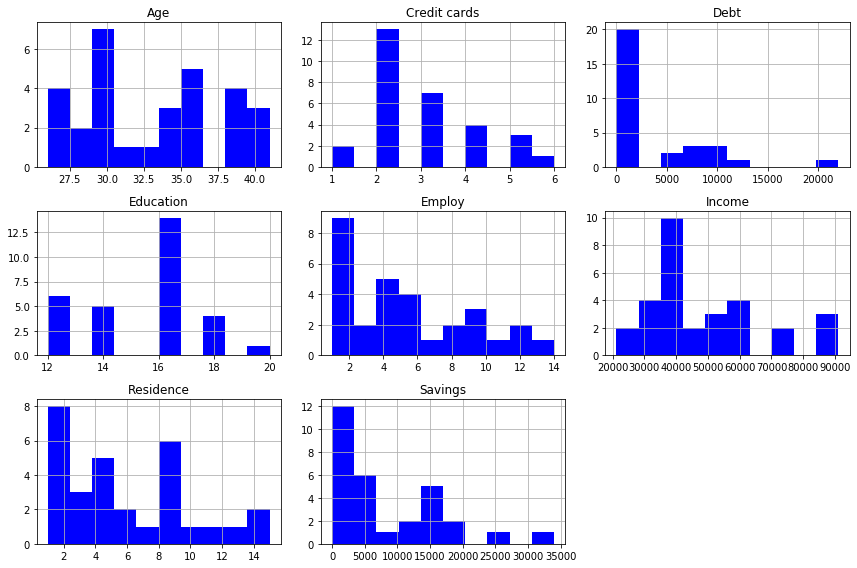

In [4]:
# (2) Histograms
print("Frequency Distributions:\n")
data.hist(grid=True, figsize=(12,8), color='blue')
plt.tight_layout()
plt.show()

In [5]:
# (3) correlation matrix (data is standardized by the formula)
colnames = features
corm = data.corr().values

print('Corelation Matrix:')
print(pd.DataFrame(np.round(corm,decimals=2),index=colnames,columns=colnames),'\n')
#pd.DataFrame(corm).to_csv('CorrelationMatrix.csv')

Corelation Matrix:
              Income  Education   Age  Residence  Employ  Savings  Debt  \
Income          1.00       0.55  0.52       0.35    0.33     0.21 -0.20   
Education       0.55       1.00  0.23       0.11    0.05     0.45 -0.46   
Age             0.52       0.23  1.00       0.84    0.85     0.55  0.03   
Residence       0.35       0.11  0.84       1.00    0.95     0.57  0.19   
Employ          0.33       0.05  0.85       0.95    1.00     0.54  0.25   
Savings         0.21       0.45  0.55       0.57    0.54     1.00 -0.39   
Debt           -0.20      -0.46  0.03       0.19    0.25    -0.39  1.00   
Credit cards   -0.06      -0.30 -0.13       0.05    0.02    -0.41  0.47   

              Credit cards  
Income               -0.06  
Education            -0.30  
Age                  -0.13  
Residence             0.05  
Employ                0.02  
Savings              -0.41  
Debt                  0.47  
Credit cards          1.00   



In [6]:
# Check for significant correlations for Dimension Reduction to be fruitful
# Standardization not needed - should be raw data like other stats test.
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(data)
print("chi_square_value:",chi_square_value, "\nP-value:", p_value)
if (p_value <0.05): print('CONCLUSION: REJECT THE NULL - Correlations EXISTS')

chi_square_value: 173.01622444105612 
P-value: 3.2842239591607713e-23
CONCLUSION: REJECT THE NULL - Correlations EXISTS


In [7]:
# Check for sampling adequacy

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(data)
print("\nKaiser-Meyer-Olkin:", kmo_model)
if (kmo_model > 0.5): print("CONCLUSION: Sampling is Adequate")


Kaiser-Meyer-Olkin: 0.6855653942535218
CONCLUSION: Sampling is Adequate


In [8]:
# (4) Standardized the data
data_std = StandardScaler().fit_transform(data) #mean=0; var=1)$

In [9]:
# Run the PCA Method
n_components = len(features)
pca = PCA(n_components).fit(data_std)

In [10]:
# generate PC labels:
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))

In [11]:
# get the eigenvectors
eigenvectors = np.round(pca.components_.transpose(),decimals=3)
print('\nEigenvectors (Linear Coefficients):')
print(pd.DataFrame(eigenvectors,index=colnames,columns=PCs),'\n')

# PC1 = Income*0.312 + Education*0.237 + Age*0.484 .... + Credit Cards*-0.123


Eigenvectors (Linear Coefficients):
                PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8
Income        0.314 -0.145  0.676 -0.347  0.241 -0.494 -0.018 -0.030
Education     0.237 -0.444  0.401  0.240 -0.622  0.357 -0.103  0.057
Age           0.484  0.135  0.004 -0.212  0.175  0.487  0.657 -0.052
Residence     0.466  0.277 -0.091  0.116  0.035  0.085 -0.487 -0.662
Employ        0.459  0.304 -0.122 -0.017  0.014  0.023 -0.368  0.739
Savings       0.404 -0.219 -0.366  0.436 -0.143 -0.568  0.348 -0.017
Debt         -0.067  0.585  0.078 -0.281 -0.681 -0.245  0.196 -0.075
Credit cards -0.123  0.452  0.468  0.703  0.195  0.022  0.158  0.058 



In [12]:
# get eigenvalues to calculate the loadings
eigenvalues = pca.explained_variance_

print('Loading Matrix:'); 
loadings= np.sqrt(eigenvalues)*eigenvectors
print(pd.DataFrame(np.round(loadings,decimals=4),index=colnames,columns=PCs),'\n')
pd.DataFrame(loadings).to_csv("Loadings.csv")

Loading Matrix:
                 PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8
Income        0.6015 -0.2153  0.7028 -0.2573  0.1572 -0.2050 -0.0065 -0.0062
Education     0.4540 -0.6594  0.4169  0.1780 -0.4057  0.1482 -0.0371  0.0118
Age           0.9272  0.2005  0.0042 -0.1572  0.1141  0.2021  0.2366 -0.0107
Residence     0.8927  0.4114 -0.0946  0.0860  0.0228  0.0353 -0.1754 -0.1366
Employ        0.8793  0.4515 -0.1268 -0.0126  0.0091  0.0095 -0.1325  0.1525
Savings       0.7739 -0.3252 -0.3805  0.3233 -0.0933 -0.2357  0.1253 -0.0035
Debt         -0.1284  0.8688  0.0811 -0.2084 -0.4442 -0.1017  0.0706 -0.0155
Credit cards -0.2356  0.6713  0.4865  0.5213  0.1272  0.0091  0.0569  0.0120 



In [13]:
var_expln= np.round(pca.explained_variance_ratio_ * 100,decimals=2)
eigval = -np.sort(-eigenvalues) #'-'=descending

npc = 6 # display
print("Eigenvalues                      :",np.round(eigval[0:npc],decimals=3))
print("Eigenvalues (%Explained_Variance):",var_expln[0:npc])
print("Eigenvalues (%Cumulative)        :",np.cumsum(var_expln[0:npc]))

Eigenvalues                      : [3.67  2.206 1.081 0.55  0.425 0.172]
Eigenvalues (%Explained_Variance): [44.34 26.65 13.06  6.64  5.14  2.08]
Eigenvalues (%Cumulative)        : [44.34 70.99 84.05 90.69 95.83 97.91]


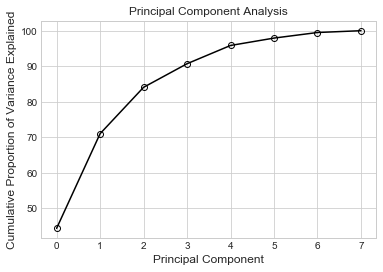

In [14]:
# pareto chart
plt.style.use('seaborn-whitegrid')
cumulative_var = np.cumsum(var_expln)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()

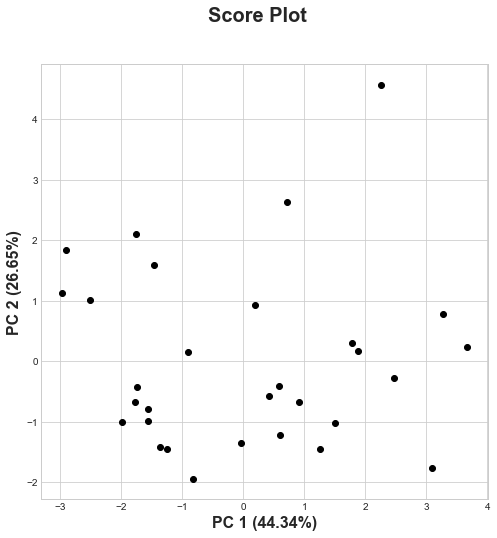

In [15]:
# Score Plot - scatterplot of new dataset with PC1 and PC2 
fig = plt.figure(figsize=(8,8))
fig.suptitle('Score Plot',fontsize=20,weight='bold')
plt.xlabel('PC 1 ('+str(var_expln[0])+'%)',fontsize=16,weight='bold')
plt.ylabel('PC 2 ('+str(var_expln[1])+'%)',fontsize=16,weight='bold')
new_reduced_dataset = pca.transform(data_std) # used for downstream analytics
plt.scatter(new_reduced_dataset[:,0],new_reduced_dataset[:,1],color='black')
plt.show(); fig.savefig('ScorePlot.jpg')

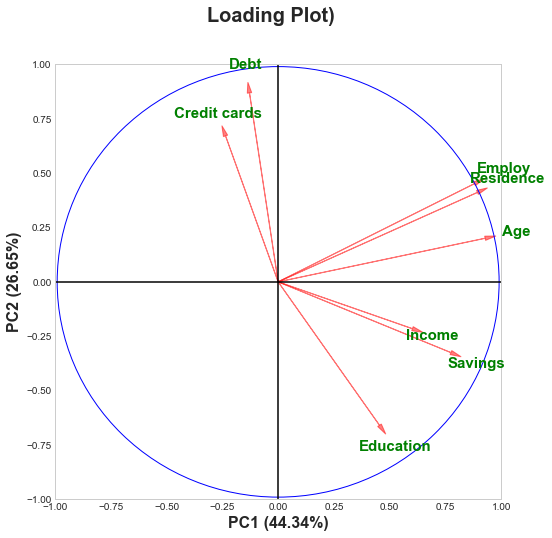

In [16]:
# Loadings Plot
p1=1; p2=2
coeff = loadings[:,p1-1:p2]
fig = plt.figure(figsize=(8,8))
plt.xlim(-1,1)
plt.ylim(-1,1)
fig.suptitle('Loading Plot)',fontsize=20,weight='bold')
plt.xlabel('PC'+str(p1)+' ('+str(var_expln[p1-1])+'%)',fontsize=16,weight='bold')
plt.ylabel('PC'+str(p2)+' ('+str(var_expln[p2-1])+'%)',fontsize=16,weight='bold')

for i in range(len(coeff[:,0])):
    plt.arrow(0,0,coeff[i,0],coeff[i,1],color='r',
              alpha=0.5,head_width=0.02, head_length=0.05)
    plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,features[i],fontsize=15,
             color='g',ha='center',va='center',weight='bold')

circle = plt.Circle((0, 0), 0.99,  color='b', fill=False)
ax = fig.gca(); ax.add_artist(circle)
plt.axhline(0, color='black'); plt.axvline(0, color='black')
plt.grid();
plt.show(); fig.savefig('Loadings.jpg')

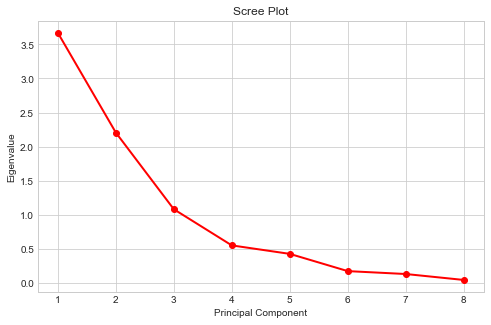

In [17]:
## scree plot, eigval from covar
num_vars= len(features)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

plt.plot(sing_vals, eigval, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [18]:
# compute the communilaties for the selected number of PC
no_pc =2
loadings_sq = loadings*loadings #square matrix
communality = np.sum(loadings_sq[:,0:no_pc],axis=1).tolist()
print("\n** Communalities for",no_pc,"PCs):")
print(pd.DataFrame(communality,index=colnames),'\n')


** Communalities for 2 PCs):
                     0
Income        0.408208
Education     0.640920
Age           0.899891
Residence     0.966167
Employ        0.977002
Savings       0.704765
Debt          0.771255
Credit cards  0.506117 

